In [20]:

%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

# Caso de estudio: PCA

## Introducción

Uno de los usos donde es posible ver conceptos de álgebra lineal aplicados es en el análisis de componentes principales o PCA por sus siglas en inglés. El objetivo de PCA es reducir la dimensionalidad de los datos para hacer más sencillo su tratamiento. 

## Preliminares

Con el fin de hacer este caso de estudio autocontenido, es necesario explicar algunos conceptos que si bien no están relacionados con PCA si lo están con sus datos de entrada. Por esto, en esta sección revisaremos algunos conceptos de diversas.

## Matriz de covarianza

La covarianza es una medida de la tendencia que tienen dos variables (estadísticas) de cambiar juntas. De aqui podemos realizar las siguientes deducciones:

1. La covarianza se maximiza cuando dos vectores son idénticos.
2. La covarianza es 0 si los vectores son ortogonales.
3. La covarianza es negativa si los vectores tienen direcciones opuestas.

Consideremos los siguientes datos para aplicar el concepto de covarianza.


In [18]:
bcData = pd.read_csv("./datasets/breastcancer.csv")

In [8]:
bcData.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


La siguiente matriz describe la covarianza entre dos variables de los datos. La primera columna corresponde a la variable `radius_mean`y la segunda a `area_min`.

varianzas de las variables en los datos

In [15]:
np.cov(bcData.radius_mean, bcData.area_mean)

array([[1.24189201e+01, 1.22448341e+03],
       [1.22448341e+03, 1.23843554e+05]])

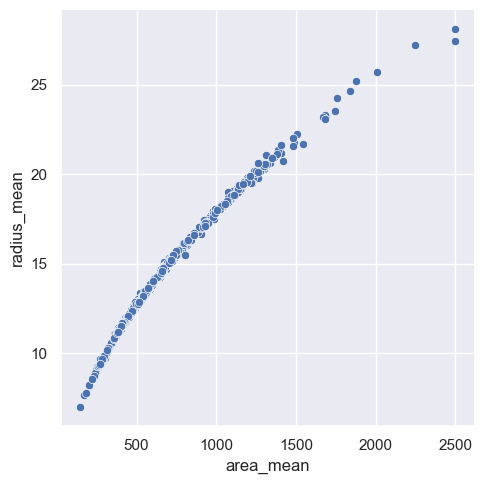

In [23]:
sns.relplot(data=bcData,x="area_mean", y="radius_mean")

Las varianzas se presentan a continuación.

In [13]:
varRM = np.var(bcData.radius_mean)
varAM = np.var(bcData.area_mean)
varFD = np.var(bcData.fractal_dimension_se)
print(varRM, varAM, varFD)

12.39709425935181 123625.90307986429 6.9893863052926034e-06


covarianza entre las variables `radius_mean` y `area_mean`:

In [16]:
bcData.radius_mean.cov(bcData.area_mean)

1224.483409346457

covarianza entre `radius_mean`y `fractas_dimension_se`

In [17]:
bcData.radius_mean.cov(bcData.fractal_dimension_se)

-0.00039762485764406293

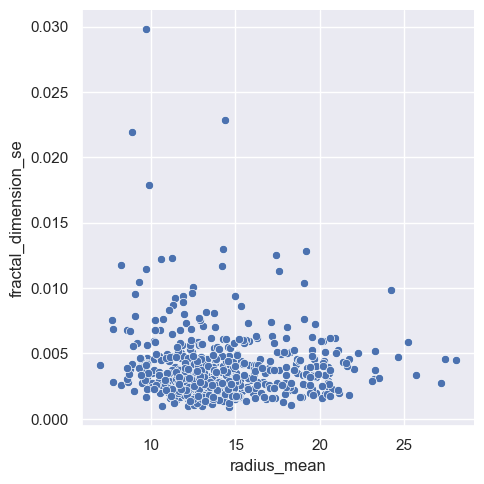

In [24]:
sns.relplot(data=bcData, x="radius_mean", y="fractal_dimension_se")

## Los datos

En general, cuando se quiere aplicar PCA se cuenta con un conjunto de datos que tiene la siguiente forma.

$$
X = 
\begin{bmatrix}
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
X_1 & X_2 & \cdots{} & X_d \\
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
\end{bmatrix}
\in \mathcal{R}^{n\times d}
$$

Donde las columnas de $X$ son las variables estadísticas y las filas son las observaciones. Así, en esta matriz se representan $n$ observaciones (individuos) y para cada una de ellas su respectivo valor para la variable $d$. 

Lo primero entonces es centrar los datos. Esto es, 

$$ X_{i,j} = X_{i,j} - \frac{1}{n}\Sigma_{i=1}^{n}X_{i,j}$$

 Es decir, cada elemento de la matriz se le resta la media de la columna. Esto se hace para que cada elemento de la matriz ahora tenga el significado de que tan lejos está de la media de la variable a la que pertenece. Esta es la $X$ que seguiremos utilizando a lo largo del caso de estudio.

### Covarianza

Ahora lo que necesitamos es conocer que tan similares son las varianzas de las variables. Es decir, necesitamos calcular, por ejemplo, que tan similar es la varianza de la variable $i$ con respecto a la variable $j$. Como son variables y las estamos representando como vectores, existe una operación sobre vectores que calcula que tan similares son dos vectores?

Si!, es el producto punto:

$$\begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n\end{bmatrix} \cdot \begin{bmatrix} w_1 & w_2 & \cdots & w_n\end{bmatrix} = v_1 \cdot w_1 + v_2 \cdot w_2 + \cdots + v_n \cdot w_n $$

Recuerde que el significado de la operación $\vec{v}\cdot \vec{w}$ es que factor de $\vec{v}$ es la proyección de $\vec{w}$ sobre $\vec{v}$. 

Luego si trasladamos esta noción a lo que estamos representando en $X$ sería: $X_i \cdot X_j$ es el factor de la proyección del vector $X_j$ sobre el vector $X_i$. Y esto sería el factor de relación entre las variables $i$ y $j$. 

Ahora lo que necesitamos es calcular esta noción para cada par de variables. Esto es, necesitamos calcular:


$$
\begin{bmatrix}
\cdots{} & \cdots{} & X_1 & \cdots{} \\
\cdots{} & \cdots{} & X_2 & \cdots{} \\
\cdots{} & \cdots{} & \vdots{} & \cdots{} \\
\cdots{} & \cdots{} & \vdots{} & \cdots{} \\
\cdots{} & \cdots{} & X_d & \cdots{} \\
\end{bmatrix}
\begin{bmatrix}
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
X_1 & X_2 & \cdots{} & X_d \\
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
\vdots{} & \vdots{} & \cdots{} & \vdots{} \\
\end{bmatrix}
= X^{T}X 
$$

$X^{T}X$ is a symmetric and square matrix of dimensions $d\times d$. Hasta aquí existe todavía un problema y es que los valores de esta matriz van a aumentar con el número de observaciones que se tengan en los datos. Por esto, dividimos cada dato entre $n$ y obtenermos:

$$\Sigma = \text{cov}(X) = \frac{X^{T}X}{n} $$


### Significado

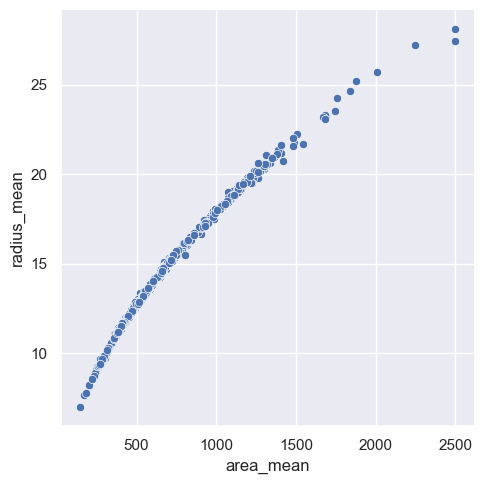